In [2]:
import pandas as pd
!ls

Activity 6.ipynb snap_data.csv    twtr_data.csv
fb_data.csv      sp500_data.csv


In [35]:
fb_df = pd.read_csv("fb_data.csv",index_col="date",parse_dates=True,infer_datetime_format=True)
snap_df = pd.read_csv("snap_data.csv",index_col="date",parse_dates=True,infer_datetime_format=True)
snp_df = pd.read_csv("sp500_data.csv",index_col="date",parse_dates=True,infer_datetime_format=True)
twtr_df = pd.read_csv("twtr_data.csv",index_col="date",parse_dates=True,infer_datetime_format=True)

In [36]:
fb_df.rename(columns={"close": "fb"},inplace=True)
snap_df.rename(columns={"close": "snap"},inplace=True)
snp_df.rename(columns={"close": "snp"},inplace=True)
twtr_df.rename(columns={"close": "twtr"},inplace=True)

In [37]:
all_data = pd.concat([fb_df,snap_df,snp_df, twtr_df], axis="columns", join="inner")

In [46]:
all_data.sort_index(ascending=True, inplace = True)

In [47]:
all_data

,fb,snap,snp,twtr
date,,,,
2017-03-02,136.76,24.48,2381.919922,15.79
2017-03-03,137.17,27.09,2383.120117,15.75
2017-03-06,137.42,23.77,2375.310059,15.56
2017-03-07,137.30,21.44,2368.389893,15.18
2017-03-08,137.72,22.81,2362.979980,15.24
...,...,...,...,...
2019-05-13,181.54,10.11,2811.870117,36.59
2019-05-14,180.73,10.49,2834.409912,36.93
2019-05-15,186.27,10.66,2850.959961,37.90


In [48]:
all_data_pct = all_data.pct_change().dropna()

In [49]:
all_data_pct

,fb,snap,snp,twtr
date,,,,
2017-03-03,0.002998,0.106618,0.000504,-0.002533
2017-03-06,0.001823,-0.122554,-0.003277,-0.012063
2017-03-07,-0.000873,-0.098023,-0.002913,-0.024422
2017-03-08,0.003059,0.063899,-0.002284,0.003953
2017-03-09,0.003776,-0.004384,0.000800,-0.001312
...,...,...,...,...
2019-05-13,-0.036105,-0.036225,-0.024131,-0.048375
2019-05-14,-0.004462,0.037587,0.008016,0.009292
2019-05-15,0.030653,0.016206,0.005839,0.026266


In [30]:
# Calculate the total variance of the S&P 500 daily returns.
variance_snp = all_data_pct['snp'].var()
# calculating cov
covariance_fb = all_data_pct['fb'].cov(all_data_pct['snp'])
covariance_snap = all_data_pct['snap'].cov(all_data_pct['snp'])
covariance_twtr = all_data_pct['twtr'].cov(all_data_pct['snp'])
print(f"Facebook covariance: {covariance_fb}")
print(f"Twitter covariance: {covariance_snap}")
print(f"Snapchat covariance: {covariance_twtr}")

Facebook covariance: 9.057133292975441e-05
Twitter covariance: 8.143752411104527e-05
Snapchat covariance: 0.00010735216060481899


In [22]:
beta_fb = covariance_fb / variance_snp
beta_snap = covariance_fb / variance_snp
beta_twtr = covariance_fb / variance_snp

In [24]:
# Calculate the rolling 30-day covariances of each stock's daily returns to that of the S&P 500. 
rolling_fb = all_data_pct['fb'].rolling(window = 30).cov(all_data_pct['snp'])
rolling_snap = all_data_pct['snap'].rolling(window = 30).cov(all_data_pct['snp'])
rolling_twtr = all_data_pct['twtr'].rolling(window = 30).cov(all_data_pct['snp'])
# Calculate the rolling 30-day variance of S&P 500 daily returns.
rolling_var = all_data_pct['snp'].rolling(window = 30).var()

In [28]:
fb_roll_beta = rolling_fb / rolling_var
snap_roll_beta = rolling_snap / rolling_var
twtr_roll_beta = rolling_twtr / rolling_var

<AxesSubplot:title={'center':'Rolling 30day Beta of BTC'}, xlabel='date'>

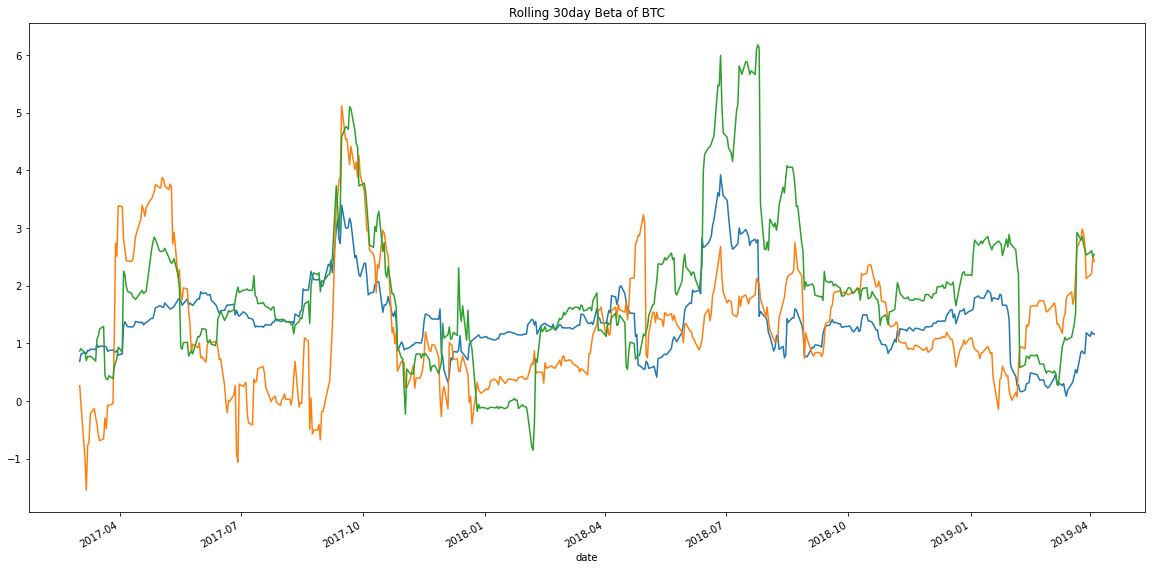

In [29]:
fb_roll_beta.plot(figsize=(20,10), title = 'Rolling 30day Beta of BTC')
snap_roll_beta.plot(figsize=(20,10), title = 'Rolling 30day Beta of BTC')
twtr_roll_beta.plot(figsize=(20,10), title = 'Rolling 30day Beta of BTC')